We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Plotting the data points for data visualization

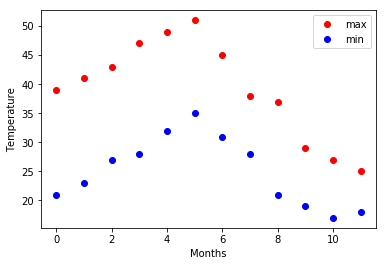

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]) # Create max_temp array
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]) # Create min_temp array

months = np.arange(12) # Create months with range 12
plt.plot(months, max_temp, 'ro', label='max') # Plot months on X-axis and max_temp on Y-axis with red circles
plt.plot(months, min_temp, 'bo', label='min') # Plot months on X-axis and min_temp on Y-axis with blue circles
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.legend(loc='upper right')

fitting it to the periodic function

In [20]:
from scipy import optimize
def periodic(times, average, amplitude, offset):
    return (average + amplitude * np.cos((times + offset) * 1.8 * np.pi / times.max()))

#curve_fit uses non-linear least squares to fit the data 
opt_max, cov_max = optimize.curve_fit(periodic, months,max_temp, [40, 20, 0]) 
opt_min, cov_min = optimize.curve_fit(periodic, months,min_temp, [-40, 20, 0])

Plotting the fit

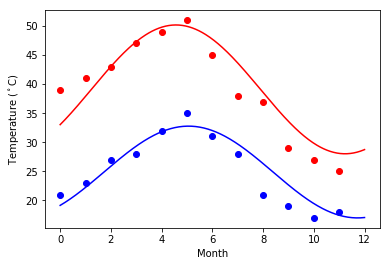

In [40]:
days = np.linspace(0, 12, num=365)
plt.plot(months, max_temp, 'ro')
plt.plot(days, periodic(days, *opt_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, periodic(days, *opt_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:


In [27]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [28]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Charts to plot:
1. Create a pie chart presenting the male/female proportion

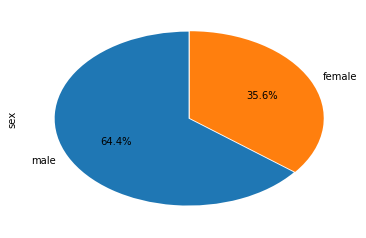

In [36]:
titanic.sex.value_counts().plot.pie(autopct='%1.1f%%',startangle=90,explode=(0,0.01))

Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

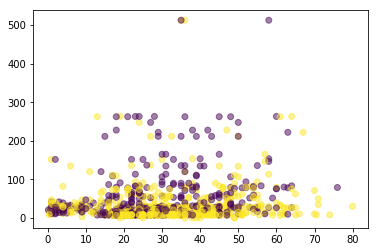

In [39]:
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=pd.factorize(titanic['sex'])[0])